In [ ]:
import pandas as pd
proteinatlas_path = "./proteinatlas.tsv"
proteinatlas = pd.read_csv(proteinatlas_path, sep='\t')

In [ ]:
def generate_uniProtIds_bloodIm_bloodBm_map(proteinatlas: pd.DataFrame):
    uniprot_to_bloodIm_and_bloodMs_map = {}
    for uniprot, blood_ms in proteinatlas[['Uniprot', 'Blood concentration - Conc. blood MS [pg/L]']].values:
        if not pd.isnull(uniprot) and not pd.isnull(blood_ms):
            uniprot_to_bloodIm_and_bloodMs_map[normlize_uniprotID(uniprot)] = blood_ms
    return uniprot_to_bloodIm_and_bloodMs_map

def normlize_uniprotID(uniport_id: str):
    """
        由于 proteinatlas.tsv 浓度表提供的 Uniport 列蛋白质组中蛋白质的分隔符为 " ," 和图谱库中的分隔符不一致, 因此需要规范化为图谱库的格式

        Parameters:
        ---
        -   uniport_id: 浓度表中的 uniprot_id

        Returns:
        ---
        -   str: 规范化后的蛋白质组
    """
    split_ids = uniport_id.split(", ")
    normlized_id = ";".join(split_ids)
    return sort_protein_in_group(normlized_id)

def sort_protein_in_group(protein_group: str):
    """
        将蛋白质组中的蛋白质进行排序, 方便后面筛选

    Parameters:
    ---
    -   protein_group: 蛋白质组

    Returns:
    ---
    -   str: 排序之后的蛋白质组
    """
    proteins = protein_group.split(';')
    proteins.sort()
    sorted_protein_group = ';'.join(proteins)
    return sorted_protein_group

In [ ]:
import numpy as np
uniProtIds_bloodIm_bloodBm_map = generate_uniProtIds_bloodIm_bloodBm_map(
    proteinatlas)
proteins = []
abundances = []
for protein, abundance in uniProtIds_bloodIm_bloodBm_map.items():
    proteins.append(protein)
    abundances.append(abundance)
proteins, abundances = np.array(proteins), np.array(abundances)

In [ ]:
sort_reverseindex = np.argsort(-abundances)
abundances = abundances[sort_reverseindex]
proteins = proteins[sort_reverseindex]

In [ ]:
for protein, abundance in zip(proteins, abundances):
    print(protein, abundance)

In [ ]:
sn = np.load("./protein/spectronaut/dataset7.npy", allow_pickle=True).item()
dl = np.load("./protein/deeplearning/dataset7.npy", allow_pickle=True).item()

In [ ]:
sn_sole, dl_sole = sn['20221114_PRO1_LS_39_50-0039_Plasma_12_0.746_A5_P3-A-5_1_11692'], dl['20221114_PRO1_LS_39_50-0039_Plasma_12_0.746_A5_P3-A-5_1_11692']

In [ ]:
sn_dl_overlap = sn_sole & dl_sole

In [ ]:
have_density = []
density = []
for p in sn_dl_overlap:
    if p in proteins:
        have_density.append(p)
        density.append(abundances[proteins==p][0])

In [ ]:
have_density, density = np.array(have_density), np.array(density)
sort_reverseindex = np.argsort(-density)
have_density, density = have_density[sort_reverseindex], density[sort_reverseindex]

In [ ]:
import pandas as pd

df = pd.DataFrame(columns=['protein', 'density'])
df['protein'] = have_density
df['density'] = density

In [ ]:
df.to_csv('protein_density.tsv', sep='\t', index=None)

In [ ]:
library = pd.read_csv("./library/AD8-300S-directDIA.tsv", sep='\t')

In [ ]:
# sequences = {
#     'P00450': 'MKILILGIFLFLCSTPAWAKEKHYYIGIIETTWDYASDHGEKKLISVDTEHSNIYLQNGPDRIGRLYKKALYLQYTDETFRTTIEKPVWLGFLGPIIKAETGDKVYVHLKNLASRPYTFHSHGITYYKEHEGAIYPDNTTDFQRADDKVYPGEQYTYMLLATEEQSPGEGDGNCVTRIYHSHIDAPKDIASGLIGPLIICKKDSLDKEKEKHIDREFVVMFSVVDENFSWYLEDNIKTYCSEPEKVDKDNEDFQESNRMYSVNGYTFGSLPGLSMCAEDRVKWYLFGMGNEVDVHAAFFHGQALTNKNYRIDTINLFPATLFDAYMVAQNPGEWMLSCQNLNHLKAGLQAFFQVQECNKSSSKDNIRGKHVRHYYIAAEEIIWNYAPSGIDIFTKENLTAPGSDSAVFFEQGTTRIGGSYKKLVYREYTDASFTNRKERGPEEEHLGILGPVIWAEVGDTIRVTFHNKGAYPLSIEPIGVRFNKNNEGTYYSPNYNPQSRSVPPSASHVAPTETFTYEWTVPKEVGPTNADPVCLAKMYYSAVDPTKDIFTGLIGPMKICKKGSLHANGRQKDVDKEFYLFPTVFDENESLLLEDNIRMFTTAPDQVDKEDEDFQESNKMHSMNGFMYGNQPGLTMCKGDSVVWYLFSAGNEADVHGIYFSGNTYLWRGERRDTANLFPQTSLTLHMWPDTEGTFNVECLTTDHYTGGMKQKYTVNQCRRQSEDSTFYLGERTYYIAAVEVEWDYSPQREWEKELHHLQEQNVSNAFLDKGEFYIGSKYKKVVYRQYTDSTFRVPVERKAEEEHLGILGPQLHADVGDKVKIIFKNMATRPYSIHAHGVQTESSTVTPTLPGETLTYVWKIPERSGAGTEDSACIPWAYYSTVDQVKDLYSGLIGPLIVCRRPYLKVFNPRRKLEFALLFLVFDENESWYLDDNIKTYSDHPEKVNKDDEEFIESNKMHAINGRMFGNLQGLTMHVGDEVNWYLMGMGNEIDLHTVHFHGHSFQYKHRGVYSSDVFDIFPGTYQTLEMFPRTPGIWLLHCHVTDHIHAGMETTYTVLQNEDTKSG',
#     'P04275': 'MIPARFAGVLLALALILPGTLCAEGTRGRSSTARCSLFGSDFVNTFDGSMYSFAGYCSYLLAGGCQKRSFSIIGDFQNGKRVSLSVYLGEFFDIHLFVNGTVTQGDQRVSMPYASKGLYLETEAGYYKLSGEAYGFVARIDGSGNFQVLLSDRYFNKTCGLCGNFNIFAEDDFMTQEGTLTSDPYDFANSWALSSGEQWCERASPPSSSCNISSGEMQKGLWEQCQLLKSTSVFARCHPLVDPEPFVALCEKTLCECAGGLECACPALLEYARTCAQEGMVLYGWTDHSACSPVCPAGMEYRQCVSPCARTCQSLHINEMCQERCVDGCSCPEGQLLDEGLCVESTECPCVHSGKRYPPGTSLSRDCNTCICRNSQWICSNEECPGECLVTGQSHFKSFDNRYFTFSGICQYLLARDCQDHSFSIVIETVQCADDRDAVCTRSVTVRLPGLHNSLVKLKHGAGVAMDGQDVQLPLLKGDLRIQHTVTASVRLSYGEDLQMDWDGRGRLLVKLSPVYAGKTCGLCGNYNGNQGDDFLTPSGLAEPRVEDFGNAWKLHGDCQDLQKQHSDPCALNPRMTRFSEEACAVLTSPTFEACHRAVSPLPYLRNCRYDVCSCSDGRECLCGALASYAAACAGRGVRVAWREPGRCELNCPKGQVYLQCGTPCNLTCRSLSYPDEECNEACLEGCFCPPGLYMDERGDCVPKAQCPCYYDGEIFQPEDIFSDHHTMCYCEDGFMHCTMSGVPGSLLPDAVLSSPLSHRSKRSLSCRPPMVKLVCPADNLRAEGLECTKTCQNYDLECMSMGCVSGCLCPPGMVRHENRCVALERCPCFHQGKEYAPGETVKIGCNTCVCQDRKWNCTDHVCDATCSTIGMAHYLTFDGLKYLFPGECQYVLVQDYCGSNPGTFRILVGNKGCSHPSVKCKKRVTILVEGGEIELFDGEVNVKRPMKDETHFEVVESGRYIILLLGKALSVVWDRHLSISVVLKQTYQEKVCGLCGNFDGIQNNDLTSSNLQVEEDPVDFGNSWKVSSQCADTRKVPLDSSPATCHNNIMKQTMVDSSCRILTSDVFQDCNKLVDPEPYLDVCIYDTCSCESIGDCACFCDTIAAYAHVCAQHGKVVTWRTATLCPQSCEERNLRENGYECEWRYNSCAPACQVTCQHPEPLACPVQCVEGCHAHCPPGKILDELLQTCVDPEDCPVCEVAGRRFASGKKVTLNPSDPEHCQICHCDVVNLTCEACQEPGGLVVPPTDAPVSPTTLYVEDISEPPLHDFYCSRLLDLVFLLDGSSRLSEAEFEVLKAFVVDMMERLRISQKWVRVAVVEYHDGSHAYIGLKDRKRPSELRRIASQVKYAGSQVASTSEVLKYTLFQIFSKIDRPEASRITLLLMASQEPQRMSRNFVRYVQGLKKKKVIVIPVGIGPHANLKQIRLIEKQAPENKAFVLSSVDELEQQRDEIVSYLCDLAPEAPPPTLPPDMAQVTVGPGLLGVSTLGPKRNSMVLDVAFVLEGSDKIGEADFNRSKEFMEEVIQRMDVGQDSIHVTVLQYSYMVTVEYPFSEAQSKGDILQRVREIRYQGGNRTNTGLALRYLSDHSFLVSQGDREQAPNLVYMVTGNPASDEIKRLPGDIQVVPIGVGPNANVQELERIGWPNAPILIQDFETLPREAPDLVLQRCCSGEGLQIPTLSPAPDCSQPLDVILLLDGSSSFPASYFDEMKSFAKAFISKANIGPRLTQVSVLQYGSITTIDVPWNVVPEKAHLLSLVDVMQREGGPSQIGDALGFAVRYLTSEMHGARPGASKAVVILVTDVSVDSVDAAADAARSNRVTVFPIGIGDRYDAAQLRILAGPAGDSNVVKLQRIEDLPTMVTLGNSFLHKLCSGFVRICMDEDGNEKRPGDVWTLPDQCHTVTCQPDGQTLLKSHRVNCDRGLRPSCPNSQSPVKVEETCGCRWTCPCVCTGSSTRHIVTFDGQNFKLTGSCSYVLFQNKEQDLEVILHNGACSPGARQGCMKSIEVKHSALSVELHSDMEVTVNGRLVSVPYVGGNMEVNVYGAIMHEVRFNHLGHIFTFTPQNNEFQLQLSPKTFASKTYGLCGICDENGANDFMLRDGTVTTDWKTLVQEWTVQRPGQTCQPILEEQCLVPDSSHCQVLLLPLFAECHKVLAPATFYAICQQDSCHQEQVCEVIASYAHLCRTNGVCVDWRTPDFCAMSCPPSLVYNHCEHGCPRHCDGNVSSCGDHPSEGCFCPPDKVMLEGSCVPEEACTQCIGEDGVQHQFLEAWVPDHQPCQICTCLSGRKVNCTTQPCPTAKAPTCGLCEVARLRQNADQCCPEYECVCDPVSCDLPPVPHCERGLQPTLTNPGECRPNFTCACRKEECKRVSPPSCPPHRLPTLRKTQCCDEYECACNCVNSTVSCPLGYLASTATNDCGCTTTTCLPDKVCVHRSTIYPVGQFWEEGCDVCTCTDMEDAVMGLRVAQCSQKPCEDSCRSGFTYVLHEGECCGRCLPSACEVVTGSPRGDSQSSWKSVGSQWASPENPCLINECVRVKEEVFIQQRNVSCPQLEVPVCPSGFQLSCKTSACCPSCRCERMEACMLNGTVIGPGKTVMIDVCTTCRCMVQVGVISGFKLECRKTTCNPCPLGYKEENNTGECCGRCLPTACTIQLRGGQIMTLKRDETLQDGCDTHFCKVNERGEYFWEKRVTGCPPFDEHKCLAEGGKIMKIPGTCCDTCEEPECNDITARLQYVKVGSCKSEVEVDIHYCQGKCASKAMYSIDINDVQDQCSCCSPTRTEPMQVALHCTNGSVVYHEVLNAMECKCSPRKCSK',
#     'A0A0B4J1Y8': 'MAWAPLLLTLLSLLTGSLSQPVLTQPPSASASLGASVTLTCTLSSGYSNYKVDWYQQRPGKGPRFVMRVGTGGIVGSKGDGIPDRFSVLGSGLNRYLTIKNIQEEDESDYHCGADHGSGSNFV'
# }
# protein_to_peptides = {}
# for protein in sequences.keys():
#     protein_to_peptides[protein] = set(list(library[library['UniProtIds']==protein]['StrippedPeptide']))

df = pd.read_csv('./protein_density_annot-seq.tsv', sep='\t')
sequences = {
    protein: sequence
    for protein, sequence in df[['protein', 'Sequence']].to_numpy()
}
protein_to_peptides = {}
for protein in sequences.keys():
    protein_to_peptides[protein] = set(list(library[library['UniProtIds']==protein]['StrippedPeptide']))

In [ ]:
protein_to_peptides

In [ ]:
sn, dl = np.load("./peptide/spectronaut/dataset7.npy", allow_pickle=True).item()['20221114_PRO1_LS_39_50-0039_Plasma_12_0.746_A5_P3-A-5_1_11692'], np.load("./peptide/deeplearning/dataset7.npy", allow_pickle=True).item()['20221114_PRO1_LS_39_50-0039_Plasma_12_0.746_A5_P3-A-5_1_11692']
method_peptides = {
    'sn': sn,
    'dl': dl
}
methods = ['sn', 'dl']

In [ ]:
havefind = {
    protein: {
        'sn': set(),
        'dl': set()
    }
    for protein in protein_to_peptides.keys()
}
for method in methods:
    for protein, peptides in protein_to_peptides.items():
        for peptide in method_peptides[method]:
            if peptide in peptides:
                havefind[protein][method].add(peptide)

In [ ]:
for protein, val in havefind.items():
    print(protein, len(val['sn']), len(val['dl']), len(val['sn'] & val['dl']))

In [ ]:
for protein, val in havefind.items():
    overlap = val['sn'] & val['dl']
    havefind[protein]['overlap'] = overlap
    havefind[protein]['dl'] = havefind[protein]['dl'] - overlap
    havefind[protein]['sn'] = havefind[protein]['sn'] - overlap

In [ ]:
havefind

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
list(set(library[library['UniProtIds']=='A0A0B4J1Y8']['Protein Name']))

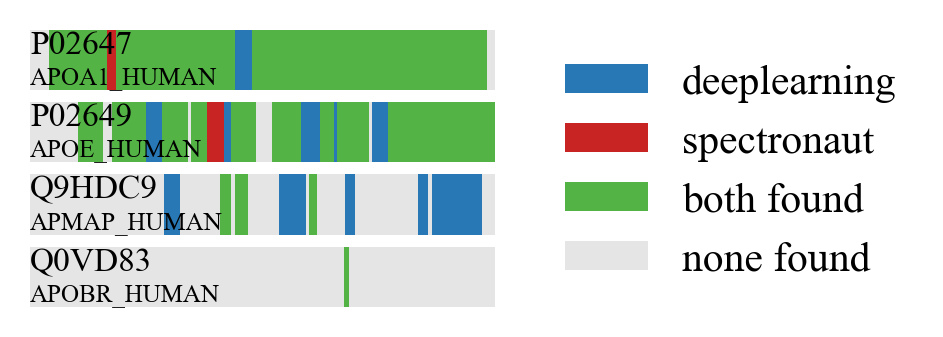

In [85]:
from matplotlib.patches import Rectangle
plt.rcParams['font.family'] = ["Times New Roman"]

proteins = ['P02647', 'P02649', 'Q9HDC9', 'Q0VD83']

# proteins = [
#     'P02753',
#     'P02647',
#     'P04114',
#     'P02652',
#     'P06727',
#     'P02655',
#     'P02749',
#     'P01031',
#     'P02649',
#     'P10909',
#     'P02654',
#     'P0DJI8',
#     'P68871',
#     'P02741',
#     'Q9UGM5',
#     'Q13790',
#     'P61769',
#     'P08519',
#     'P06702',
#     'P55056',
#     'O00187',
#     'Q15166',
#     'P05109',
#     'Q9HDC9',
#     'Q0VD83'
# ]
protein_name = {
    # 'P00450': 'CERU_HUMAN',
    # 'P04275': 'VWF_HUMAN',
    # 'A0A0B4J1Y8': 'LV949_HUMAN'
    protein: name
    for protein, name in df[['protein', 'Entry Name']].to_numpy()
    if protein in proteins
}

found_colors = {
    'sn': '#C82423',
    'dl': '#2878B5',
    'overlap': '#54B345',
}

def get_rect(start_x, start_y, width, color, alpha):
    rect = Rectangle((start_x, start_y), width=width, height=1)
    rect.set_facecolor(color)
    rect.set_alpha(alpha)
    return rect

figure = plt.figure(figsize=(2, 1.2), dpi=300)
legend = None
for i, protein in enumerate(proteins):
    ax = plt.subplot(len(proteins), 1, i + 1)
    sequence = sequences[protein]
    ax.set_xlim(0, len(sequence))
    ax.set_axis_off()
    full_rect = get_rect(0, 0, len(sequence), "gray", 0.2)
    ax.add_patch(full_rect)
    ax.set_ylim(0, 1)
    for content, val in havefind[protein].items():
        for peptide in val:
            start_x = sequence.find(peptide)
            rect = get_rect(start_x, 0, len(peptide), found_colors[content], 1.0)
            ax.add_patch(rect)
    if i == 0:
        legend = ax.legend(labels=['deeplearning', 'spectronaut', 'both found', 'none found'], ncols=1)
        # legend 位于 ax 的正上方中央
        legend.get_frame().set_facecolor('none')
        legend.get_frame().set_edgecolor('none')
        legend.get_frame().set_linewidth(0.0)
        # # 获取 legend 中的 handle 和 labels
        # handles, labels = ax.get_legend_handles_labels()
        # legend.set_bbox_to_anchor((.015, 1.05))
        colors = ['#2878B5', '#C82423', '#54B345', '#E5E5E5']
        for i, color in enumerate(colors):
            legend.get_patches()[i].set_facecolor(color)
            legend.get_patches()[i].set_alpha(1.0)
        legend.set_bbox_to_anchor((1.07, 1.05)) 
        # legend.remove()
    ax.text(0, 0.6, protein, fontsize=8)
    ax.text(0, 0.1, protein_name[protein], fontsize=6)
# figure.legend(handles, labels, bbox_to_anchor=((1.0, 0.5)))
# figure.axes[0].legend().remove()
figure.savefig('protein_coverage.png', dpi=1000, bbox_inches="tight")
figure.savefig('protein_coverage.svg', dpi=1000, bbox_inches="tight")

In [89]:
for protein in proteins:
    print(f"{protein}: {len(havefind[protein]['dl'])}/{len(havefind[protein]['sn'])}/{len(havefind[protein]['overlap'])}")

P02647: 7/4/39
P02649: 12/2/24
Q9HDC9: 10/0/3
Q0VD83: 0/0/1
